In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df=pd.read_csv('advertising_spend_vs_sales_revenue.csv')
print(f"Shape :{df.shape}")
df.head()

Shape :(500, 2)


,Advertising Spend ($),Sales Revenue ($)
0,2743.579875,10562.775144
1,8798.436865,29248.946706
2,7994.517614,28648.516173
3,6618.673163,22403.006889
4,8520.759118,33363.200297


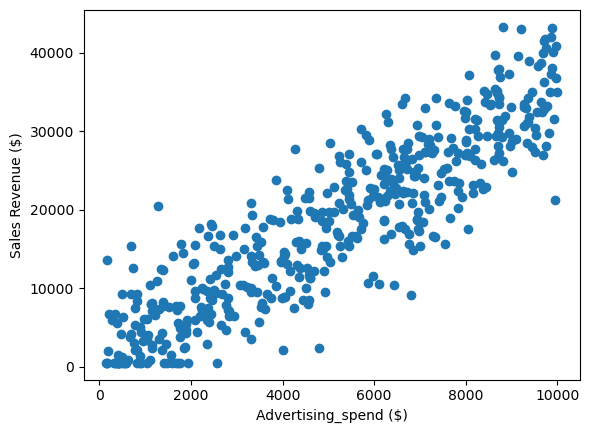

In [8]:
plt.scatter(df["Advertising Spend ($)"],df["Sales Revenue ($)"])
plt.xlabel("Advertising_spend ($)")
plt.ylabel("Sales Revenue ($)")
plt.show()

In [9]:
df.corr()

,Advertising Spend ($),Sales Revenue ($)
Advertising Spend ($),1.000000,0.897125
Sales Revenue ($),0.897125,1.000000


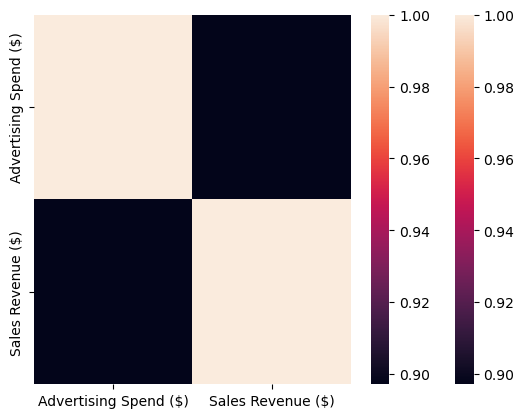

In [11]:
sns.heatmap(df.corr())
plt.show()

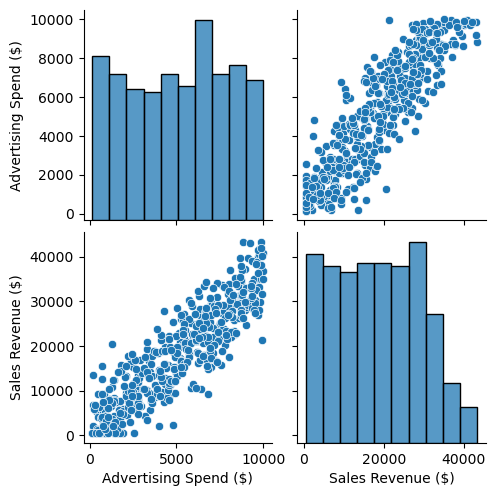

In [14]:
sns.pairplot(df)
plt.show()

### Creating dependent and independent variables

In [15]:
X=df[["Advertising Spend ($)"]]
y=df["Sales Revenue ($)"]

###  Segregating data for training and testing

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=20)

In [17]:
X_train.shape

(375, 1)

In [18]:
X_test.shape

(125, 1)

### Standardization

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [20]:
X_train

array([[ 9.86381906e-01],
       [-5.56988854e-02],
       [ 1.27855434e+00],
       [-4.10269471e-01],
       [-1.40030972e+00],
       [ 1.34772900e+00],
       [ 3.10545461e-01],
       [-1.62380898e+00],
       [-6.32030543e-01],
       [-6.02651408e-01],
       [ 2.81891867e-01],
       [ 9.51118483e-01],
       [ 5.62444069e-01],
       [ 1.10592229e+00],
       [ 1.38470746e+00],
       [ 6.47517064e-01],
       [-1.28641486e+00],
       [ 7.68897976e-01],
       [-1.10315465e+00],
       [ 1.62972295e+00],
       [ 1.47543094e+00],
       [-3.15743704e-01],
       [ 6.55428118e-01],
       [-1.14736093e-03],
       [ 7.93763309e-01],
       [ 1.29219624e+00],
       [-7.76143109e-01],
       [ 7.34216962e-01],
       [-9.19363064e-01],
       [ 4.68093389e-01],
       [ 5.03495787e-01],
       [-8.03250046e-01],
       [-7.97169407e-02],
       [ 1.11453995e+00],
       [ 9.52911355e-01],
       [ 1.59628262e+00],
       [-5.65941889e-01],
       [-5.73319816e-01],
       [ 1.4

### Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)


LinearRegression(n_jobs=-1)

In [22]:
regression.coef_

array([9748.83333503])

In [23]:
regression.intercept_

18127.44000141425

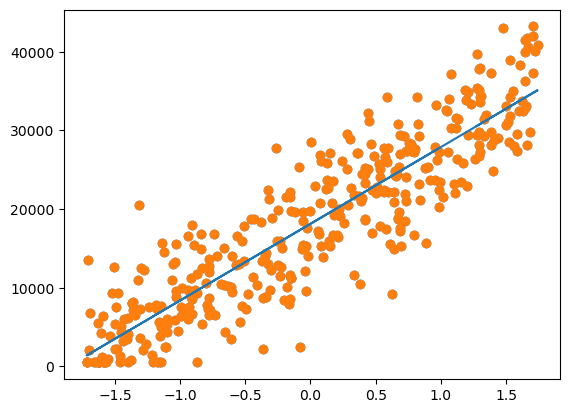

In [29]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

In [31]:
y_pred=regression.predict(X_test)
y_pred

array([30712.81092762,  5683.24885034, 20507.04570534, 13033.26461744,
       25556.28296459, 31152.88995222, 34945.09693929, 14511.58123886,
       10051.21974941,  7388.64576688,  6402.56930067,  5670.63620838,
       26048.93620466, 26987.11778525, 16469.03653621,  3274.56198858,
       35180.56147235, 28287.53641858,  9104.75473068,  5602.55438777,
       19570.80816131, 32972.84864776,  5694.21670773, 25314.90010803,
       35001.35718468, 30846.17649563, 13745.23540819, 28671.76445623,
        3685.5007244 , 16374.21105475, 30746.33516917, 17030.05565377,
        5733.22403654, 11801.14786077, 18150.94293078, 12670.54091597,
       17949.87493921, 34119.80596605, 28317.73234799,  8924.9956297 ,
       28507.99637329,  8381.5687277 , 12674.18946763, 12335.44355887,
       23461.99171725, 29282.34909217,  2256.45624652, 34656.09804125,
       28425.1210116 ,  3271.68439561, 18102.39539393,  8672.1286459 ,
       22242.24202243, 18458.05937485, 33940.86709822, 12818.40773064,
      

### Performance metrics

### MSE,MAE and RMSE

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [38]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f"""Mean squared error : {mse}
Mean absolute error : {mae}
Root mean squared error :{rmse}""")

Mean squared error : 24571224.69222145
Mean absolute error : 3805.631509553808
Root mean squared error :4956.9370272600245


### R^2 and Adjusted R^2

In [39]:
from sklearn.metrics import r2_score

In [41]:
score=r2_score(y_test,y_pred)
score

0.7890997488819291

In [46]:
Adjusted_R2=1-(1-score)*(len(y_test)-1)/len(y_test)-X_test.shape[1]-1
Adjusted_R2

-1.2092130491091262

### OLS linear regression

In [51]:
import statsmodels.api as sm

In [52]:
model=sm.OLS(y_train,X_train).fit()

In [54]:
prediction=model.predict(X_test)
prediction

array([ 12585.3709262 , -12444.19115107,   2379.60570392,  -5094.17538398,
         7428.84296318,  13025.44995081,  16817.65693788,  -3615.85876256,
        -8076.220252  , -10738.79423454, -11724.87070074, -12456.80379303,
         7921.49620324,   8859.67778384,  -1658.40346521, -14852.87801283,
        17053.12147094,  10160.09641717,  -9022.68527073, -12524.88561364,
         1443.36815989,  14845.40864635, -12433.22329368,   7187.46010662,
        16873.91718327,  12718.73649422,  -4382.20459322,  10544.32445482,
       -14441.93927701,  -1753.22894666,  12618.89516776,  -1097.38434765,
       -12394.21596487,  -6326.29214064,     23.50292936,  -5456.89908544,
         -177.5650622 ,  15992.36596463,  10190.29234658,  -9202.44437171,
        10380.55637188,  -9745.87127371,  -5453.25053378,  -5791.99644255,
         5334.55171584,  11154.90909075, -15870.98375489,  16528.65803983,
        10297.68101018, -14855.7556058 ,    -25.04460748,  -9455.31135552,
         4114.80202101,  

In [55]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:      Sales Revenue ($)   R-squared (uncentered):                   0.213
Model:                            OLS   Adj. R-squared (uncentered):              0.211
Method:                 Least Squares   F-statistic:                              101.3
Date:                Wed, 29 Jan 2025   Prob (F-statistic):                    3.08e-21
Time:                        07:59:04   Log-Likelihood:                         -4221.4
No. Observations:                 375   AIC:                                      8445.
Df Residuals:                     374   BIC:                                      8449.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Prediction of a new data point

In [58]:
new_spend=regression.predict(scaler.transform([[20000]]))
new_spend

c:\Users\anith\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([69520.14743495])